# Chapter 8 신경망.딥러닝의 응용

## 8.1 MNIST 데이터베이스

60000개의 훈련용 데이터가 x_train, y_train에 저장되며, 10000개의 테스트용 데이터는 x_test, y_test에 저장됩니다.

x_train은 60000x28x28의 배열 변수로, 각 요소는 0-255의 값을 갖는 정수입니다. i 번째 이미지는 x_train[i,:,:]로 꺼낼 수 있습니다. y_train의 각 요소는 0-9의 정수값을 취하며, 길이가 60000인 1차원 배열 변수로, y[i]에는 이미지 i에 대응하는 0-9의 값이 포함되어 있습니다.

In [16]:
# 리스트 8-1(1)

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test,) = mnist.load_data()

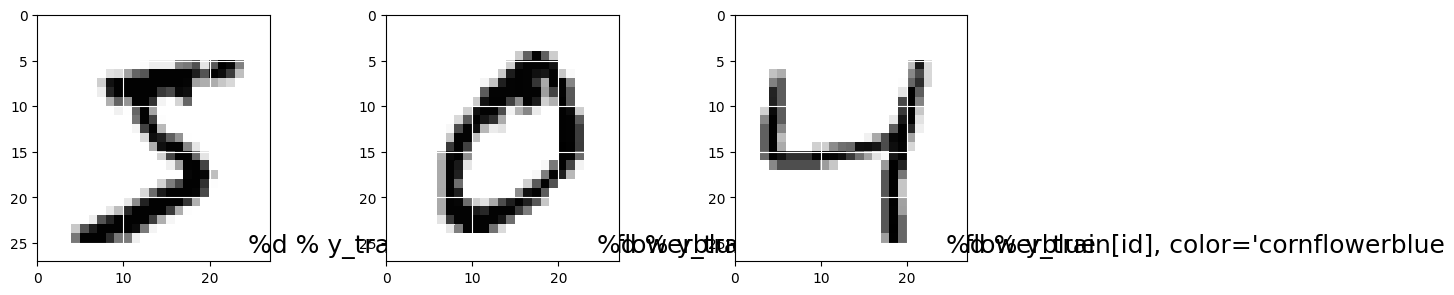

In [17]:
# 리스트 8-1-(2)
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(3):
  plt.subplot(1,3, id+1)
  img = x_train[id, :, :]
  plt.pcolor(255 - img)
  plt.text(24.5, 26, "%d % y_train[id], color='cornflowerblue", fontsize=18)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.grid('on', color='white')

plt.show()

x_train에 저장된 처음 3개의 이미지는 위와 같습니다.

## 8.2 2층 피드 포워드 네트워크 모델

In [18]:
# 리스트 8-1-(3)
from keras.utils import to_categorical

x_train = x_train.reshape(60000, 784) #(A), 28*28의 이미지를 784 길이의 벡터로 처리
x_train = x_train.astype('float32') #(B), 입력을 실수로 처리
x_train = x_train / 255 #(C), 0~1의 실수로 변환

num_classes = 10
y_train = to_categorical(y_train, num_classes) #(D), 0~9의 라벨을 one-hot encoding
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes)

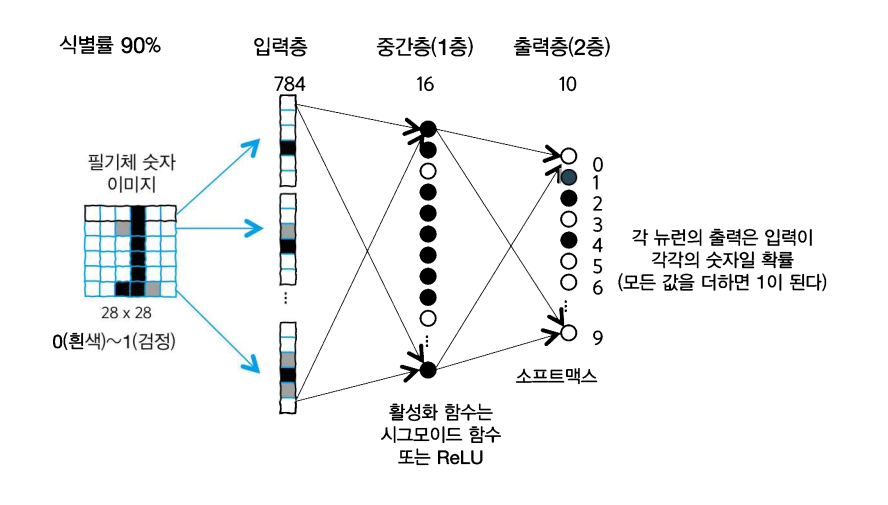

입력은 784차원의 벡터입니다. 네트워크의 출력층은 10개의 숫자를 분류할 수 있도록 10개의 뉴런으로 하여, 각 뉴런의 출력값이 확률을 나타내도록 하기 위해 활성화 함수는 소프트맥스를 사용합니다. 입력과 출력을 연결하는 중간층은 16개로 하고, 활성화 함수는 시그모이드 함수를 사용합니다.

In [19]:
# 리스트 8-1-(4)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() # (A)
model.add( Dense(16, input_dim=784, activation='sigmoid') ) #(B)
model.add( Dense(10, activation='softmax') ) #(C)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) #(D)

In [20]:
# 리스트 8-1-(5)

import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test)) #(A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 7ms/step - loss: 2.0992 - accuracy: 0.2770 - val_loss: 1.8186 - val_accuracy: 0.4414
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 1.6446 - accuracy: 0.5447 - val_loss: 1.4740 - val_accuracy: 0.6523
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 1.3555 - accuracy: 0.7228 - val_loss: 1.2215 - val_accuracy: 0.7835
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 1.1345 - accuracy: 0.8045 - val_loss: 1.0265 - val_accuracy: 0.8322
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.9640 - accuracy: 0.8363 - val_loss: 0.8774 - val_accuracy: 0.8513
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.8340 - accuracy: 0.8519 - val_loss: 0.7646 - val_accuracy: 0.8639
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.7348 - accuracy: 0.8622 - val_loss: 0.6784 - val_accuracy: 0.8717
Epoch 8/10
60/60 [==

지금까지는 1 epoch마다 전체 데이터셋에 대한 오차 함수의 기울기를 한 번 계산했습니다(full batch). 하지만 데이터가 크면 계산에 많은 시간이 걸립니다. 그런 경우에는 데이터의 일부로 오차 함수의 기울기를 게산하는 확률적 경사 하강법(SGD)가 사용됩니다. 1회 갱신에 사용하는 데이터의 크기는 batch size로 정의하며, 여기서는 1000을 사용합니다.

예를 들어 60000개에 batch_size를 1000으로 할 경우, 학습 데이터를 모두 사용하는 데 60회의 매개 변수 갱신이 진행됩니다. 이를 1 epoch라고 합니다.

일부 데이터셋에서 계산된 기울기 방향은 전체 데이터셋에서 계산된 실제 기울기 방향과는 약간 다릅니다. 즉, 전체 오차를 최소화하는 방향으로 곧장 나아가는 것이 아니라, 노이즈의 영향을 받는 것처럼 휘청거리면서 서서히 오차가 낮은 방향으로 나아갑니다.

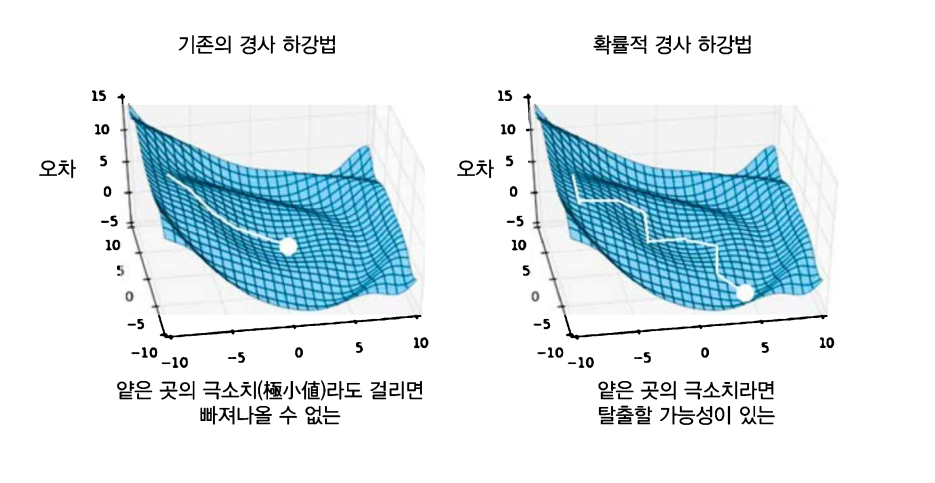

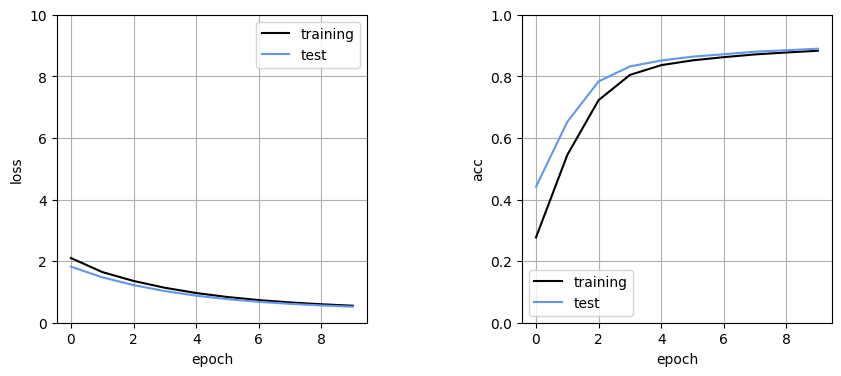

In [21]:
# 리스트 8-1-(6)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

313/313 [==============================] - 1s 2ms/step


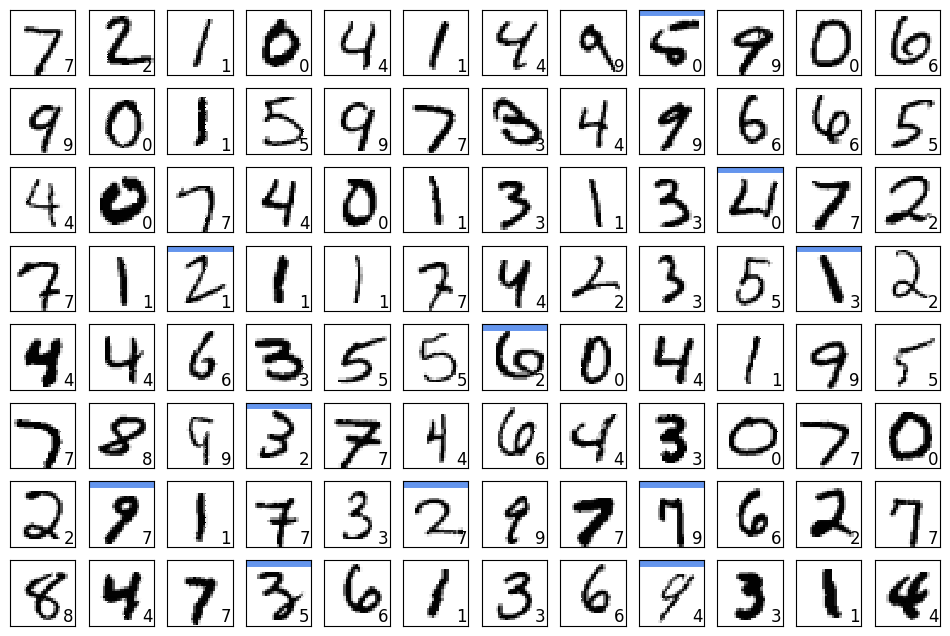

In [22]:
# 리스트 8-1-(7)

def show_prediction():
  n_show = 96
  y = model.predict(x_test)
  plt.figure(2, figsize=(12, 8))
  plt.gray()

  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, "%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot( [0,27], [1,1], color='cornflowerblue', linewidth=5 )
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")

#메인
show_prediction()
plt.show()

모델의 성능을 평가합니다. 파란색 가로줄은 오답을 나타냅니다. 성능이 그닥 좋지 않은 것을 알 수 있습니다.

## 8.3 ReLU 활성화 함수

최근에는 ReLU라는 활성화 함수가 인기입니다. 시그모이드 함수는 입력 x가 어느 정도 커지면 항상 1에 가까운 값을 출력하기 때문에, 입력의 변화가 출력에 반영되기 어렵습니다. 그 결과, 오차 함수의 가중치 매개 변수에 대한 편미분이 0에 가까운 값이 되어, 경사 하강법의 학습이 늦어지는 문제점이 있습니다.

ReLU는 gradient vanish 문제가 어느 정도 완화되며 max() 함수를 계산하기 때문에 연산 속도가 빠르다는 장점이 있습니다.

네트워크 중간층의 활성화 함수 ReLU로 바꾸어 실행해봅시다. 중간층의 activation을 시그모이드에서 ReLU로 바꿉니다.

In [23]:
# 리스트 8-1-(8)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) #(A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 3s 14ms/step - loss: 1.5755 - accuracy: 0.5043 - val_loss: 1.0121 - val_accuracy: 0.7144
Epoch 2/10
60/60 [==============================] - 0s 8ms/step - loss: 0.7934 - accuracy: 0.8051 - val_loss: 0.5939 - val_accuracy: 0.8732
Epoch 3/10
60/60 [==============================] - 1s 11ms/step - loss: 0.5027 - accuracy: 0.8821 - val_loss: 0.4101 - val_accuracy: 0.8967
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3894 - accuracy: 0.8975 - val_loss: 0.3484 - val_accuracy: 0.9077
Epoch 5/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3428 - accuracy: 0.9074 - val_loss: 0.3161 - val_accuracy: 0.9139
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3156 - accuracy: 0.9132 - val_loss: 0.2973 - val_accuracy: 0.9180
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.9179 - val_loss: 0.2838 - val_accuracy: 0.9207
Epoch 8/10
60/60 [

정확도가 3% 오른 것을 확인할 수 있습니다.

313/313 [==============================] - 0s 1ms/step


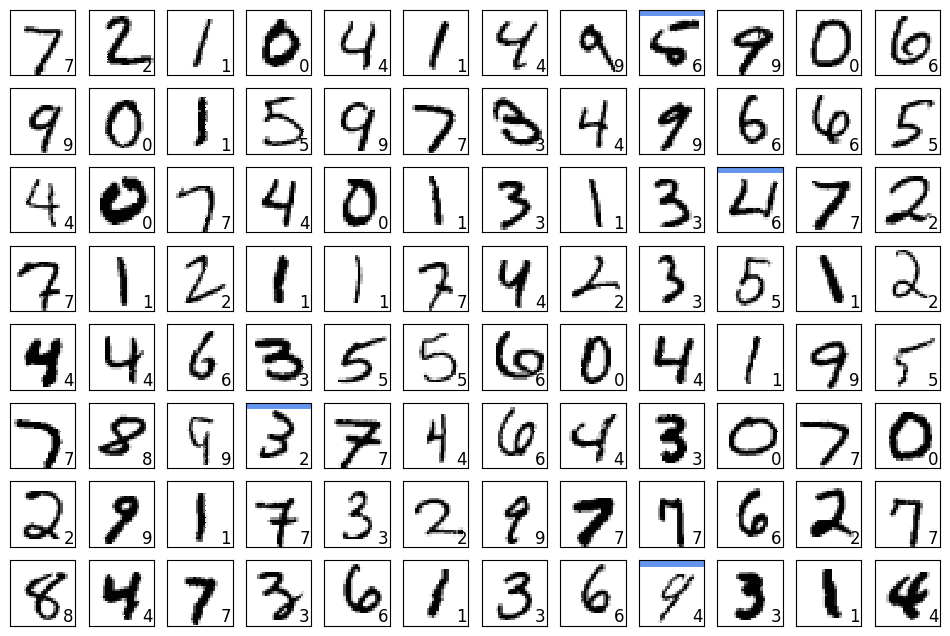

In [24]:
# 리스트 8-1-(9)
show_prediction()
plt.show()

9개에서 5개로 잘못 인식한 것이 줄어든 것을 볼 수 있습니다.

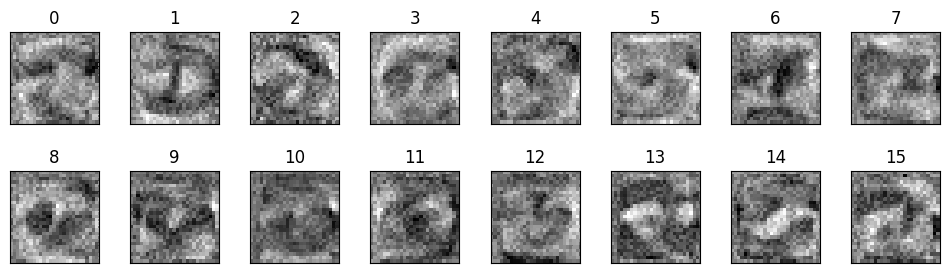

In [25]:
# 리스트 8-1-(10)
# 1층째의 가중치 시각화

w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)

for i in range(16):
  plt.subplot(2, 8, i + 1)
  w1 = w[:, i]
  w1 = w1.reshape(28, 28)
  plt.pcolor(-w1)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
plt.show()

중간층 가중치 매개 변수를 출력하면 다음과 같습니다.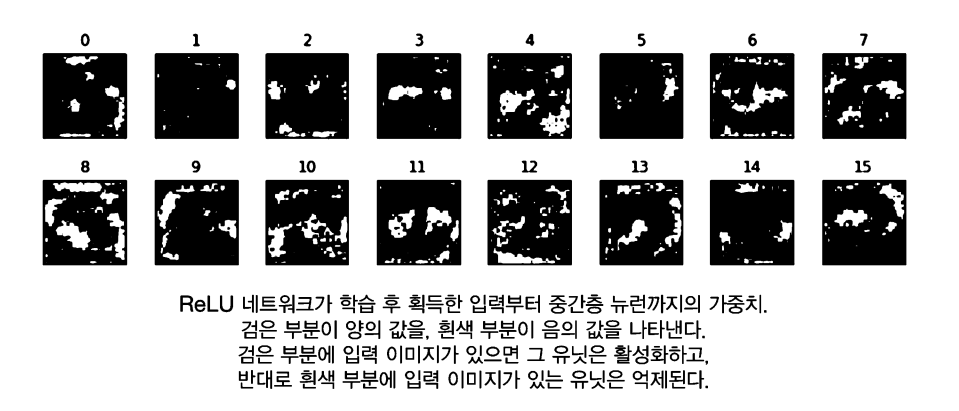

28*28의 입력으로부터 중간층의 16개 뉴런에 대한 가중치를 그리고 있습니다. 가중치 값이 양수이면 검은색으로, 음수인 경우 흰색으로 표시합니다. 원래 가중치는 임의로 설정되어 있었으므로, 이 모습은 학습에 의해 획득된 것입니다. 검은 부분에 문자 일부분이 있으면 그 뉴런은 활성화하고, 흰 부분에 문자 일부분이 있으면 억제됩니다.

이 모델은 '공간 정보'를 전혀 사용하지 않습니다. 28*28의 입력 이미지를 길이 784의 벡터로 전개하여 네트워크에 입력합니다. 화소의 정렬 순서는 네트워크 성능과 전혀 관계가 없습니다.

## 8.4 공간필터

공간 정보란 구체적으로 무엇일까요? 그것은, 직선, 곡선, 원형이나 사각형 같은 모양을 나타내는 정보입니다. 이러한 형태를 골라 내는 방법으로 '공간 필터'라는 이미지 처리법이 있습니다.

필터는 2차원 행렬로 표현됩니다. 2차원 행렬의 하나로, 필터가 있습니다. 이미지의 일부분과 필터 요소를 곱한 합을, 이미지를 슬라이드 시키면서 이미지의 전 영역에서 구합니다. 이러한 계산을 '합성곱'이라고 합니다.

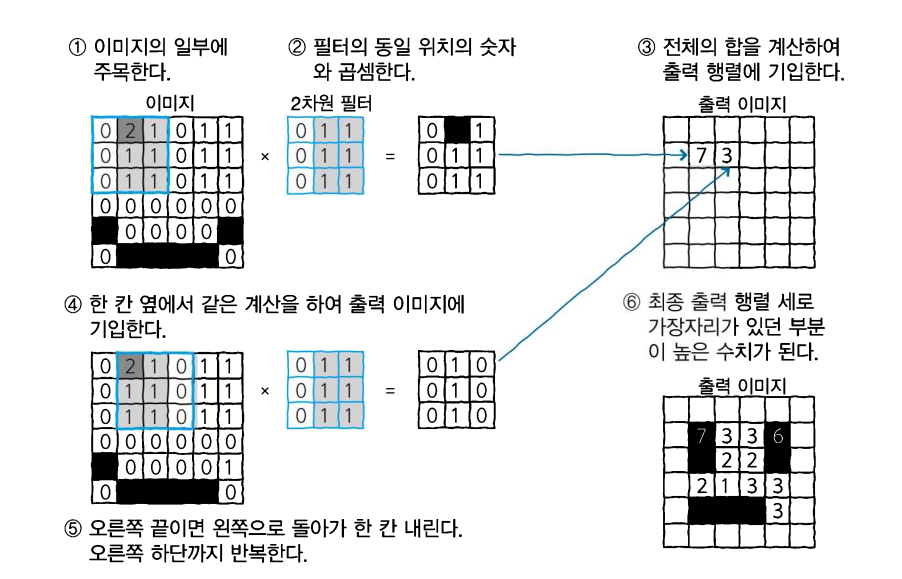

필터의 크기는 3*3뿐 아니라 임의로 결정할 수 있지만, 5x5, 7x7 등 중심을 결정할 수 있는 홀수 너비가 사용하기 쉬울 것 입니다.

In [27]:
# 리스트 8-2-(1)
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

가로 및 세로 엣지를 강조하는 2개의 필터를 훈련 데이터 4에 적용해봅시다.

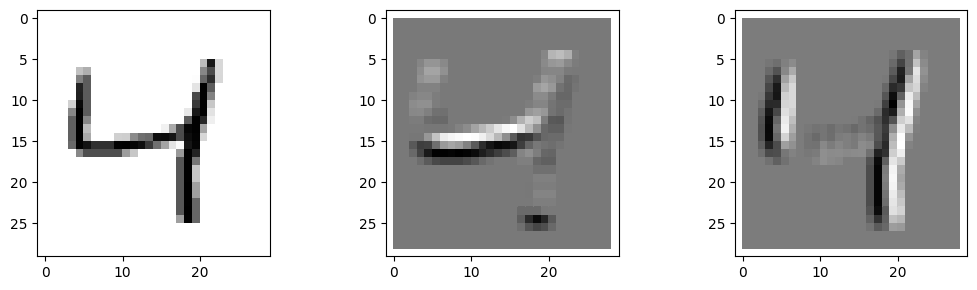

In [28]:
# 리스트 8-2-(2)
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1,1,1], [1,1,1], [-2,-2,-2]], dtype=float) #(A)
myfil2 = np.array([[-2,1,1], [-2,1,1], [-2,1,1]], dtype=float) #(B)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

#필터 처리
for ih in range(img_h - 3):
  for iw in range(img_w - 3):
    img_part = x_img[ih:ih + 3, iw:iw + 3]
    out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
    out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))

# 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1,3,2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1,3,3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

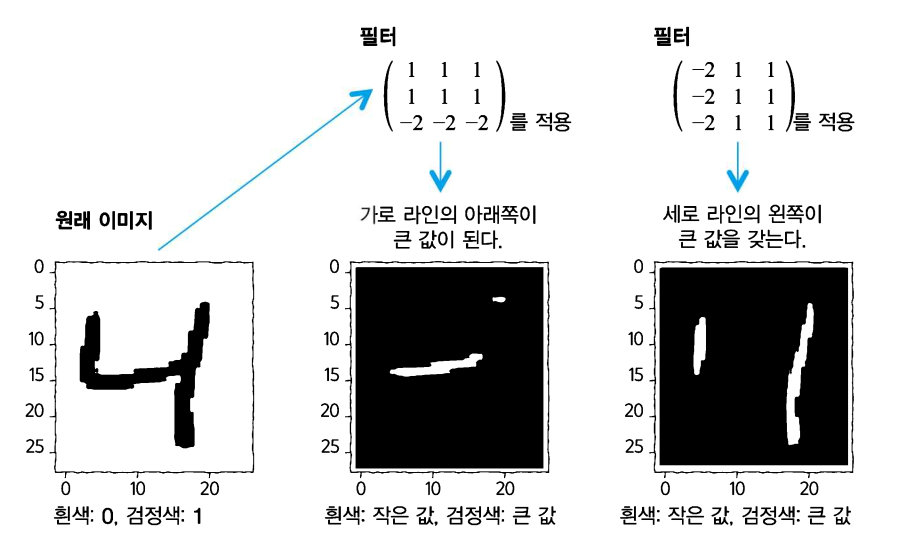

예제로 가로와 세로의 엣지를 강조하는 필터를 시험했지만, 필터의 수치를 바꾸는 것으로 대각선 엣지 강조, 이미지 스무딩, 세부 부분의 강조 등 다양한 처리가 가능합니다. 그런데 필터의 모든 요소를 합하면 0이 되도록 디자인 되어 있습니다. 이렇게 하면 공간 구조가 없는 균일한 부분은 0으로 변환되고, 필터에서 추출하려는 구조가 존재할 경우에는 0 이상의 값으로 변환되어, 0을 감지 레벨의 기준으로 세울 수 있어 편리합니다.

필터를 적용하면 출력 이미지의 크기는 작아집니다. 이 때문에 불편함도 생깁니다. 예를 들어 연속으로 다양한 필터를 적용하면 이미지가 점점 작아져 버립니다. 이 대응책으로 패딩을 이용합니다.

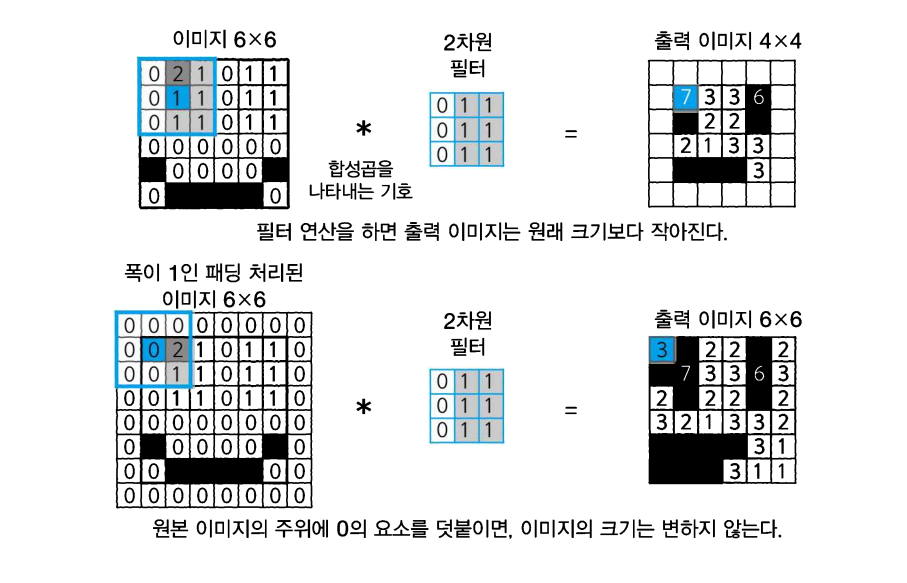

패딩은 필터를 적용하기 전에 0 등의 고정된 요소로 주위를 부풀려두는 방법입니다. 3x3의 필터를 적용할 경우에는 폭 1의 패딩을 하면 이미지 크기는 변하지 않습니다. 5x5의 경우에는 폭이 2인 패딩을 하는 것이 좋습니다.

패딩뿐 아니라, 필터 처리와 관련된 매개 변수가 하나 더 있습니다. 지금까지의 필터는 한 칸씩 이동했지만, 2칸이나 3칸 등 어떤 간격이든 이동할 수 있습니다. 이 간격을 stride라고 합니다. 스트라이드를 크게 하면 출력 이미지가 작아집니다. 패딩과 스트라이드 값은 라이브러리 합성곱 네트워크를 사용할 때 인수로 전달하게 됩니다.

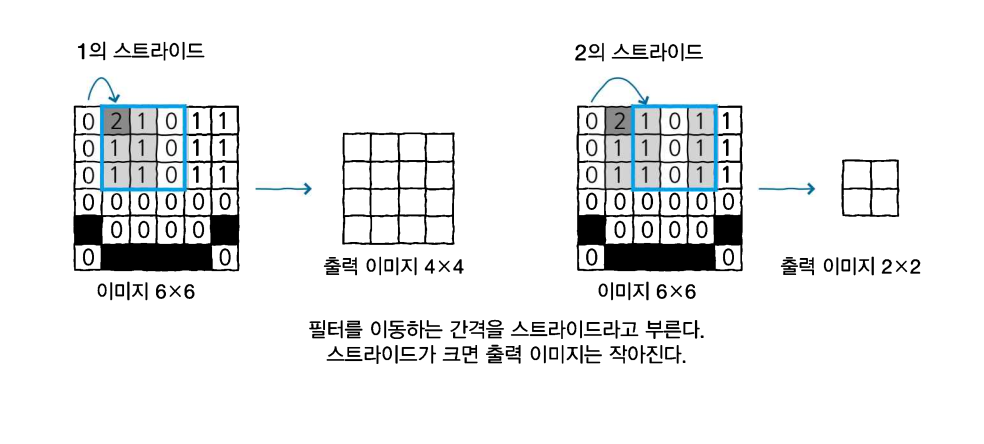

## 8.5 합성곱 신경망 (CNN)

필터를 신경망에 적용할 준비가 되었습니다. 필터를 사용한 신경망을 CNN이라고 합니다.

필터에 적용하는 수치에 따라 다양한 이미지 처리가 가능하지만 CNN은 그 필터 자체를 학습시킵니다. 먼저 필터 8장을 사용한 간단한 CNN을 만들어 봅시다. 입력 이미지에 대해 크기 3x3, 패딩 1, 스트라이드 1의 필터를 8장 적용합니다. 1창의 필터의 출력은 28x28 배열이므로 총 28x28x8의 3차원 배열이 됩니다. 이를 1차원으로 길이가 6272인 배열로 전개하고, 전결합으로 10개의 출력층 뉴런에 결합합니다.

In [29]:
# 리스트 8-2-(3)

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
# 3x3 필터를 8개 사용, 출력 크기가 변하지 않게 패딩 처리, input 흑백이기 때문에 1, 활성화 함수: ReLU
model.add(Conv2D(8, (3,3), padding='same', input_shape=(28,28,1), activation='relu')) #(A)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 3s 9ms/step - loss: 0.8137 - accuracy: 0.8063 - val_loss: 0.3546 - val_accuracy: 0.9018
Epoch 2/20
60/60 [==============================] - 0s 6ms/step - loss: 0.3367 - accuracy: 0.9029 - val_loss: 0.3039 - val_accuracy: 0.9136
Epoch 3/20
60/60 [==============================] - 0s 7ms/step - loss: 0.3026 - accuracy: 0.9133 - val_loss: 0.2846 - val_accuracy: 0.9173
Epoch 4/20
60/60 [==============================] - 0s 6ms/step - loss: 0.2857 - accuracy: 0.9182 - val_loss: 0.2738 - val_accuracy: 0.9239
Epoch 5/20
60/60 [==============================] - 0s 7ms/step - loss: 0.2744 - accuracy: 0.9224 - val_loss: 0.2671 - val_accuracy: 0.9270
Epoch 6/20
60/60 [==============================] - 0s 6ms/step - loss: 0.2665 - accuracy: 0.9246 - val_loss: 0.2643 - val_accuracy: 0.9248
Epoch 7/20
60/60 [==============================] - 0s 7ms/step - loss: 0.2590 - accuracy: 0.9267 - val_loss: 0.2550 - val_accuracy: 0.9288
Epoch 8/20
60/60 [==

CNN연산을 사용하지 않았은 2층 ReLU 네트워크는 92%였던 정확도가 96.8%까지 올랐습니다.

313/313 [==============================] - 1s 2ms/step


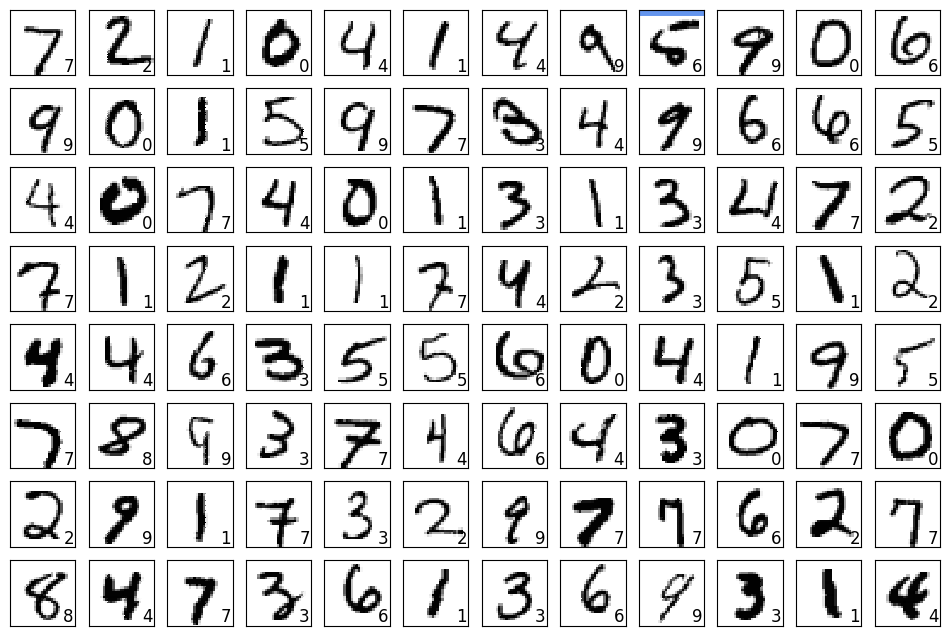

In [30]:
# 리스트 8-2-(4)
show_prediction()
plt.show()

96개 중 잘못 인식한 것은 단 1개입니다.

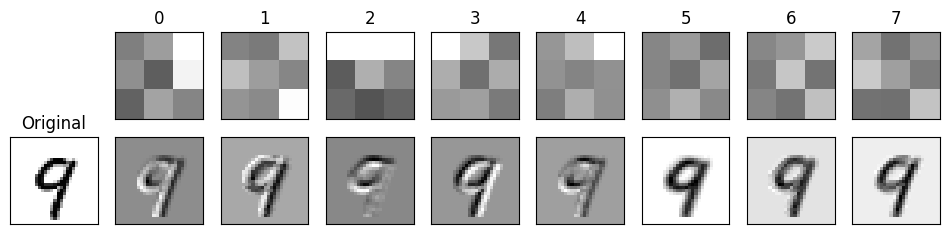

In [31]:
# 리스트 8-2-(5)
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2,9,10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28

x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0] #(A)
max_w = np.max(w)
min_w = np.min(w)

for i in range(8):
  plt.subplot(2, 9, i + 2)
  w1 = w[:, :, 0, i]
  w1 = w1.reshape(3,3)
  plt.pcolor(-w1, vmin=min_w, vmax=max_w)
  plt.xlim(0,3)
  plt.ylim(3,0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
  plt.subplot(2,9,i + 11)
  out_img = np.zeros_like(x_img)

  #필터 처리
  for ih in range(img_h - 3):
    for iw in range(img_w - 3):
      img_part = x_img[ih:ih + 3, iw:iw + 3]
      out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
  plt.pcolor(-out_img)
  plt.xlim(0, img_w)
  plt.ylim(img_h, 0)
  plt.xticks([], "")
  plt.yticks([], "")
plt.show()

위의 줄은 학습으로 얻은 필터입니다. 아래 줄은 '9'의 이미지에 각각의 필터를 적용한 이미지입니다. 작은 값은 흰색, 큰 값은 검은색으로 나타납니다.

## 8.6 풀링

합성곱층은 2차원 이미지가 가지는 특징을 이용할 수 있었지만, 이미지 인식과 관련해 중요한 것이 하나 더 있습니다. 이미지의 위치의 어긋남에 대한 견고성입니다. 예를 들어, 필기체 숫자 '2'가 1픽셀만 어긋난 이미지를 입력해도 각 배열의 수치는 완전히 달라집니다. 인간의 눈으로 봐서는 거의 동일한 입력이지만 네트워크에서는 완전히 다른 패턴으로 인식되어 버립니다 이것은 CNN을 사용해도 마찬가지입니다. 이 문제를 해결하기 위해 '풀링'을 도입합니다.

풀링 중 최대 풀링 방법을 설명합니다. 2x2 최대 풀링을 진행할 때, 2x2의 영역에서 가장 큰 값을 출력으로 가집니다. 작은 공간은 스트라이드 2로 이동해 동일한 처리를 반복하고 있습니다. 그 결과, 출력 이미지의 가로 세로 크기는 입력 이미지의 절반이 됩니다.

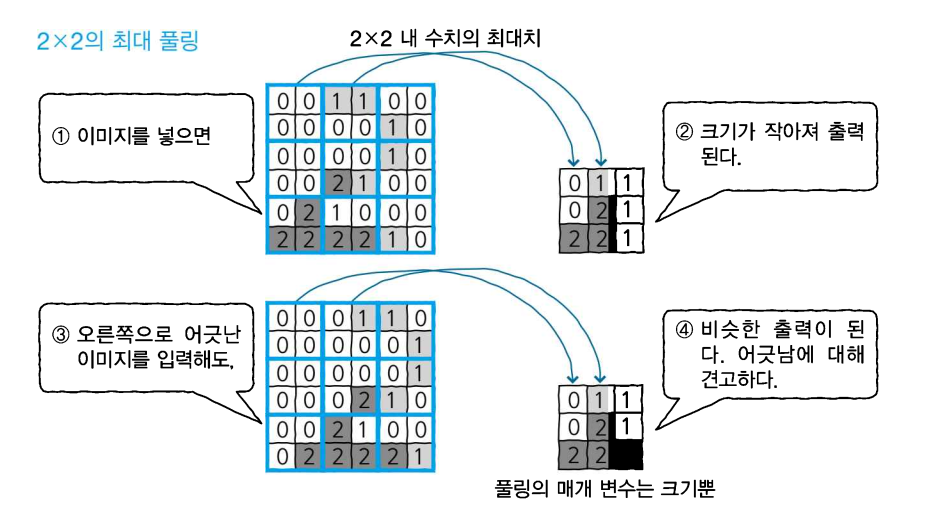

이렇게 풀링을 하여 얻은 출력 이미지는 어긋난 픽셀에 대해 견고성을 띄게 됩니다. 이외에도 평균 풀링이 있으며, 풀링을 진행할 크기와 스트라이드 값은 임의로 지정합니다.

## 8.7 드롭아웃

네트워크 학습을 개선하는 방법으로 드롭아웃이 있습니다. 드롭아웃은 학습 시에 입력층의 유닛과 중간층 뉴런을 확률 p로 임의로 선택하여, 나머지를 무효화하는 방법입니다. 무효화된 뉴런은 존재하지 않는 것으로 하여 학습을 진행합니다. 미니 배치마다 뉴런을 뽑아 다시 이 절차를 반복합니다.

학습 후 예측하는 경우에는 모든 뉴런이 사용됩니다. 학습 시에는 p의 비율의 뉴런밖에 존재하지 않는 상태에서 학습하고 있었는데, 예측 시에 모든 뉴런이 사용 되면 출력이 커져버립니다. 그래서 예측 시에는 드롭아웃을 한 층의 출력 대상의 가중치를 p배로 하여 작게 설정합니다.

드롭아웃은 여러 네트워크를 각각 학습시켜 예측 시에 네트워크를 평균화해 합치는 효과가 있습니다.

## 8.8 MNIST 인식 네트워크 모델

CNN에 풀링과 드롭아웃을 도입하여 계층의 수를 늘린 네트워크를 구축합니다. 네트워크는 다음과 같이 구성됩니다.

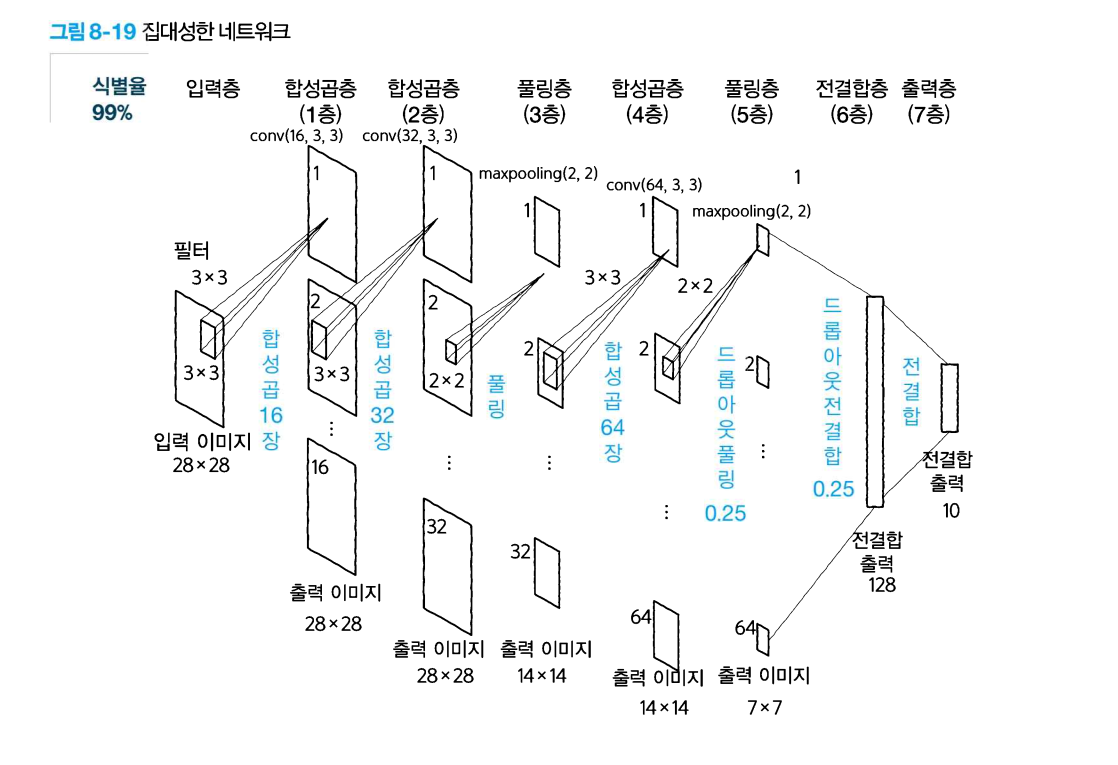

1층 필터 변수 개수: 3x3x16
2층 필터 변수 개수: 3x3x16x32
3층 필터 변수 개수: 3x3x32x64

In [ ]:
# 리스트 8-2-(6)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) #(A)
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) #(B)
model.add(Dropout(0.25)) #(C)

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) #(D)
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("test loss:", score[0])
print("test accu:", score[1])
print("computation time:{0:.3f} sec".format(time.time() - startTime))


Epoch 1/20
60/60 [==============================] - 67s 1s/step - loss: 0.6950 - accuracy: 0.7888 - val_loss: 0.1285 - val_accuracy: 0.9607
Epoch 2/20
60/60 [==============================] - 67s 1s/step - loss: 0.1349 - accuracy: 0.9596 - val_loss: 0.0619 - val_accuracy: 0.9802
Epoch 3/20
60/60 [==============================] - 67s 1s/step - loss: 0.0900 - accuracy: 0.9732 - val_loss: 0.0453 - val_accuracy: 0.9852
Epoch 4/20
60/60 [==============================] - 68s 1s/step - loss: 0.0695 - accuracy: 0.9788 - val_loss: 0.0382 - val_accuracy: 0.9877
Epoch 5/20
60/60 [==============================] - 67s 1s/step - loss: 0.0584 - accuracy: 0.9824 - val_loss: 0.0312 - val_accuracy: 0.9889
Epoch 6/20
60/60 [==============================] - 67s 1s/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.0296 - val_accuracy: 0.9906
Epoch 7/20
60/60 [==============================] - 67s 1s/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0264 - val_accuracy: 0.9915
Epoch 8/20
60/60 [==

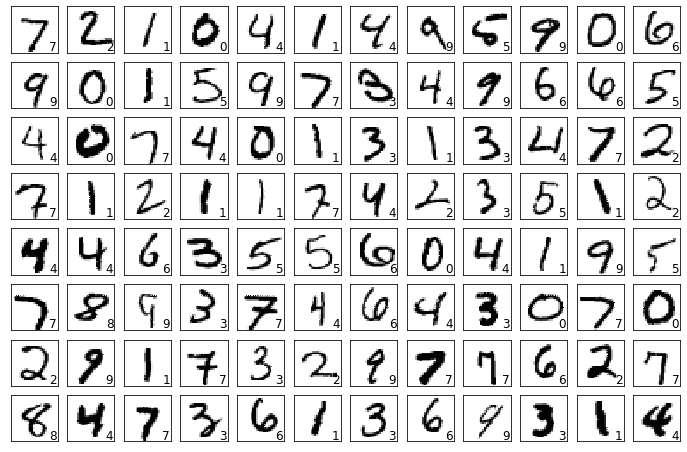

In [ ]:
# 리스트 8-2-(7)

show_prediction()
plt.show()

테스트 데이터의 96개가 모두 정답이 되었습니다. 드롭아웃을 사용해 모델이 99%라는 정답률을 얻게 되었습니다.